# Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.utils import resample

import pickle

# Recolectar datos

In [2]:
df = pd.read_csv("winequality.csv", sep=";")

In [3]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,low,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,low,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,low,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,low,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,low,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,low,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,high,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,low,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,low,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Preprocesar datos

##Limpieza de los datos

In [4]:
df.isna().sum()

type                     0
fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides               47
free sulfur dioxide      0
total sulfur dioxide     0
density                 13
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64

In [5]:
df = df[~df.isna().any(axis=1)]

In [6]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,low,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,low,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,low,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,low,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,low,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,low,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,high,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,low,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,low,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
df.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
6492    False
6493    False
6494    False
6495    False
6496    False
Length: 6437, dtype: bool

In [8]:
df.notna().any(axis=1)

0       True
1       True
2       True
3       True
4       True
        ... 
6492    True
6493    True
6494    True
6495    True
6496    True
Length: 6437, dtype: bool

## Ingeniería de características

In [9]:
df['type'].value_counts()

type
white    4847
red      1590
Name: count, dtype: int64

In [10]:
white_wine = resample(df[df['type'] == 'white'], replace=False, random_state=2, n_samples=1500)
red_wine = resample(df[df['type'] == 'red'], replace=False, random_state=2, n_samples=1500)

df = pd.concat([white_wine, red_wine])

In [11]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3822,white,6.9,0.230,0.33,high,0.056,44.0,169.0,0.99800,3.42,0.42,9.80,6
4804,white,6.8,0.450,0.36,high,0.033,28.0,156.0,0.99100,3.11,0.40,12.40,7
5716,white,6.2,0.350,0.20,high,0.069,33.0,158.0,0.99908,3.15,0.50,8.80,6
6092,white,6.8,0.310,0.25,high,0.043,30.0,165.0,0.99720,3.36,0.55,10.55,6
2415,white,8.4,0.180,0.42,high,0.036,7.0,77.0,0.99390,3.16,0.52,11.70,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,red,7.5,0.490,0.19,low,0.076,10.0,44.0,0.99570,3.39,0.54,9.70,5
820,red,7.0,0.685,0.00,low,0.099,9.0,22.0,0.99606,3.34,0.60,9.70,5
1594,red,6.2,0.600,0.08,low,0.090,32.0,44.0,0.99490,3.45,0.58,10.50,5
1540,red,6.2,0.520,0.08,medium,0.071,11.0,32.0,0.99646,3.56,0.63,11.60,6


In [12]:
df = df[['type', 'residual sugar', 'pH', 'alcohol', 'quality']]

In [13]:
df

,type,residual sugar,pH,alcohol,quality
3822,white,high,3.42,9.80,6
4804,white,high,3.11,12.40,7
5716,white,high,3.15,8.80,6
6092,white,high,3.36,10.55,6
2415,white,high,3.16,11.70,5
...,...,...,...,...,...
218,red,low,3.39,9.70,5
820,red,low,3.34,9.70,5
1594,red,low,3.45,10.50,5
1540,red,medium,3.56,11.60,6


## Codificación

In [14]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
numerical_columns = x.columns[(x.dtypes == "float64") | (x.dtypes == "int64")]
categorical_columns = x.columns[(x.dtypes == "object")]

<Axes: ylabel='Count'>

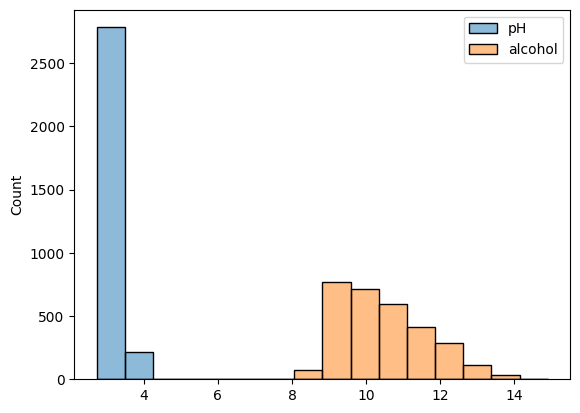

In [16]:
sns.histplot(data=x)

In [17]:
col_transf = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    (StandardScaler(), numerical_columns),
    remainder="passthrough"
)

#Entrenamiento + Evaluación

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.2)

In [19]:
models = []
models.append(("KNN", KNeighborsClassifier()))
models.append(("LR", LogisticRegression()))
models.append(("GNB", GaussianNB()))
models.append(("RF", RandomForestClassifier()))
models.append(("SVC", SVC()))

In [20]:
pipelines = {name: make_pipeline(col_transf, model) for name, model in models}

In [21]:
results = []
scoring = 'accuracy'
kfolds = 5

for name, pipeline in pipelines.items():
	cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfolds, scoring=scoring)
	results.append({name: cv_results})

c:\Users\carlo\Anaconda3\envs\sandbox\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\carlo\Anaconda3\envs\sandbox\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\carlo\Anaconda3\envs\sandbox\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\carlo\Anaconda3\envs\sandbox\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\carlo\Anaconda3\envs\sandbox\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less

In [22]:
results

[{'KNN': array([0.50416667, 0.51041667, 0.46666667, 0.49375   , 0.52916667])},
 {'LR': array([0.52708333, 0.56041667, 0.51875   , 0.52291667, 0.53333333])},
 {'GNB': array([0.50625   , 0.52291667, 0.48333333, 0.15      , 0.4875    ])},
 {'RF': array([0.4875    , 0.51458333, 0.50208333, 0.50416667, 0.52708333])},
 {'SVC': array([0.5375    , 0.55      , 0.50625   , 0.53125   , 0.55208333])}]

In [23]:
best_model = sorted(results, key=lambda x: list(x.values())[0].mean(), reverse=True)[0]
best_pipeline = pipelines[list(best_model.keys())[0]]

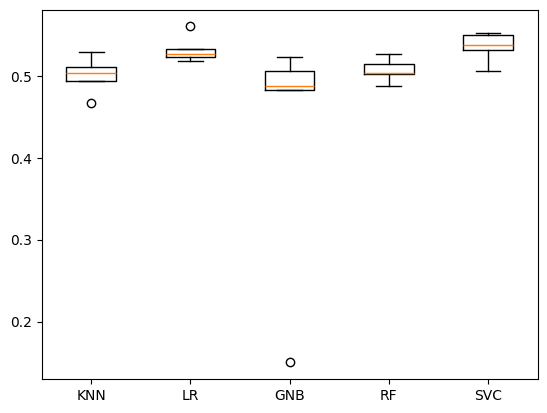

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot([list(dict_.values())[0] for dict_ in results])
ax.set_xticklabels([list(dict_.keys())[0] for dict_ in results])
plt.show()

#Predicciones

In [25]:
best_pipeline.fit(X_train, y_train)
best_pipeline.predict(X_test)

array([6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 6, 6,
       6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5,
       6, 6, 5, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6,
       5, 5, 6, 5, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 7, 6, 6, 6, 5, 6,
       6, 7, 6, 6, 5, 7, 7, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6,
       6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6,
       6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 7, 6, 6, 6, 5, 6, 5, 6, 6, 6,
       6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6,
       5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5,
       6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5,

#Exportación del modelo

In [26]:
filename = 'wine_quality_estimator.pkl'
pickle.dump(best_pipeline, open(filename, 'wb'))